# Regresión Logística

Al igual que LDA, supondremos que el logodds es lineal. Por lo tanto:

$$logodss=\frac {P(Y=1|X)}{1-P(Y=1|X)}=X^T.\vec w + b$$

Si despejamos $P(Y=1|X)$ nos queda: 

$$P(Y=1|X)=\frac{1}{1+e^{-(X^T.\vec w + b)}}$$

En el caso de LDA $\vec w$ y $b$ estaban vinculados.

Ahora vamos a plantear un criterio distinto:

<img src="Regre.jpg">

Cada vez que le damos a la entrada un conjunto de predictores a un regresor logístico, este nos devuelve un valor entre 0 y 1 que es la probabilidad de que pertenezca a la clase positiva.

Dicho de otra manera, para cada observación, el regresor logístico modela $P(y_i=1|X_i)$.
Además, contamos con las salidas deseadas $d_i$ también llamadas anotaciones o labels. Si la salida deseada $d_i=1$, nos gustaría que el regresor nos dé una salida lo mas cercana a 1 posible:

$$ P(y_i=1|X_i) -> 1 $$  

Si la salida deseada $d_i=0$ nos gustaría que:

$$ P(y_i=0|X_i) = 1-P(y_i=1|X_i) -> 1 $$

En el caso de que las observaciones sean independientes, una medida de cuan bien está ajustado nuestro modelo a todas las observaciones es multiplicar todas las estimaciones de probabilidad correspondientes a la salida deseada y tratar de que sea máxima. Es decir, si por ejemplo nuestras salidas deseadas son: 1,1,0,1,0. Nos gustaría que:

$$\mathcal{L}=P(y_1=1|X_1).P(y_2=1|X_2).P(y_3=0|X_3).P(y_4=1|X_4).P(y_5=0|X_5)$$

Sea lo mas grande posible, es decir, que esté lo mas cercano a uno posible. Escrito de otra forma:

$$\mathcal{L}=P(y_1=1|X_1).P(y_2=1|X_2).\left(1-P(y_=1|X_3)\right).P(y_4=1|X_4).\left(1-P(y_5=1|X_5)\right) -> 1$$

Escrito formalmente para un caso mas genérico, deseamos maximizar:

$$\mathcal{L}=\frac{1}{N}\prod_{i=1}^N[P(y_i=1|X_i)^{d_i}.(1-P(y_i=1|X_i)^{1-d_i})]$$

Siendo que maximizar una productoria es algo complejo, podemos maximizar su logaritmo. Esto es lo mismo ya que el logaritmo es monótono creciente.

$$\mathcal{\log L}=\frac{1}{N}\sum_{i=1}^N[P(y_i=1|X_i).d_i+(1-P(y_i=1|X_i)).(1-d_i)]$$

La derivada de esta expresión es conocida. En vez de maximizar el $\mathcal{\log L}$ podemos minimizar $\mathcal{-\log L}$. Nótese que esta última expresión es equivalente a la entropía cruzada entre las anotaciones correspondientes $d_i$ (determinística, vale 1 o 0) y la probabilidad estimada $P(Y_i=1|X_i=x_i)$. Es decir, la función de costo mide cuánto se parece la distribución de nuestro modelo con respecto a la real de los datos.  
Para el caso particular de modelar con una $P(y_i=1|X_i)$ con una función sigmoidea $\frac{1}{1+e^{-(X^T.\vec w + b)}}$, la cross-entropy (xent) nos queda:

$$xent=\frac{1}{N}\sum_{i=1}^N[\frac{1}{1+e^{-(X^T.\vec w + b)}}.d_i+(1-\frac{1}{1+e^{-(X^T.\vec w + b)}}).(1-d_i)]$$

O bien:

$$xent=\frac{1}{N}\sum_{i=1}^N[\frac{1}{1+e^{-(X^T.\vec w + b)}}.d_i + \frac{1}{1+e^{X^T.\vec w + b}}.(1-d_i)]$$

Se puede demostrar que la cross-entropy, para el caso de la regresión logística, en una función convexa y derivable. Ello la hace una función interesante ya que tiene solo un mínimo absoluto y no tiene mínimos locales.

Esto hace posible que sea muy eficiente el uso de **optimizadores**.

<img src="sgd.gif">

Veamos un ejemplo de regresión logística con el tradicional problema de pesos y alturas.

$$
{\vec w}_{i+1} = {\vec w}_i - \nabla E_\text{in}({\vec w}_i)
$$

De esta manera, iterativamente podemos encontrar el mínimo de la función de costo. Ampliaremos sobre el tema optimizadores mas adelante.

https://blog.paperspace.com/intro-to-optimization-in-deep-learning-gradient-descent/

## Implementación de la regresión logística con sklearn

In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
df = pd.read_csv('data/alturas-pesos-mils-train.csv')
df["Genero"]=(df["Genero"]!="Hombre").astype(int)
df.head() #Para visualizar las primeras 5 observaciones

,Unnamed: 0,Genero,Peso,Altura
0,7620,1,61.235,162.402
1,1837,0,97.432,181.908
2,3311,0,73.324,172.459
3,9478,1,55.193,157.748
4,7805,1,56.886,151.798


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=df[['Peso','Altura']].values
y=df['Genero'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf=clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
clf.fit(X_train, y_train)
print(clf.predict(X_train[:2, :]))
print(y_train[:2])
print(clf.predict_proba(X_train[:2, :]))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

[1 1]
[1 1]
[[6.57263654e-04 9.99342736e-01]
 [1.61855906e-01 8.38144094e-01]]
0.9177238805970149
0.9094696969696969


Using TensorFlow backend.


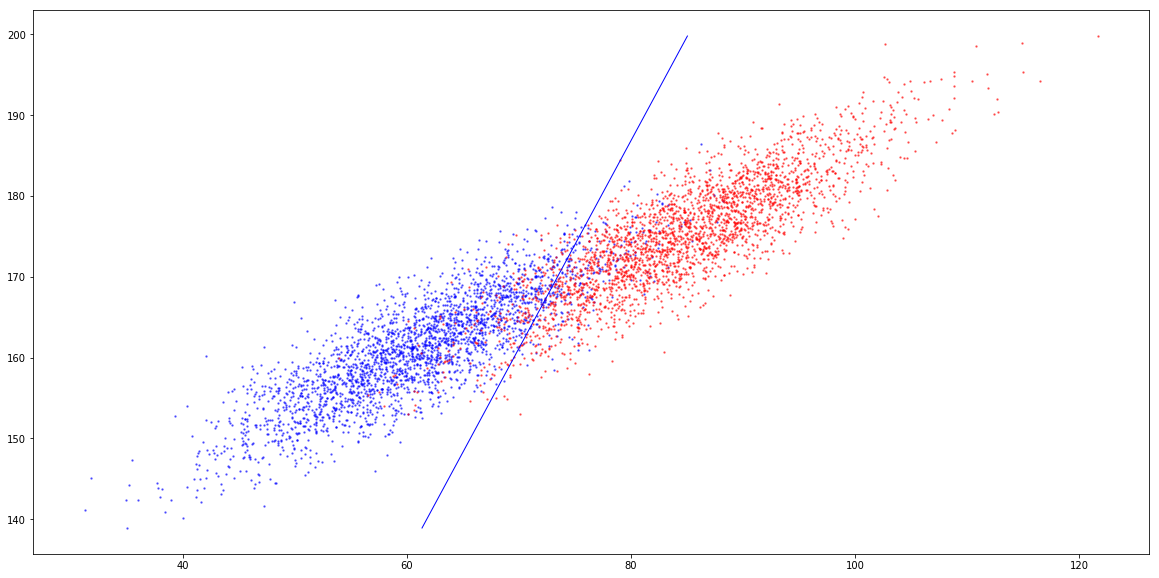

In [4]:
import helper
helper.plotBoundary(X_train, y_train,  clf, 50)

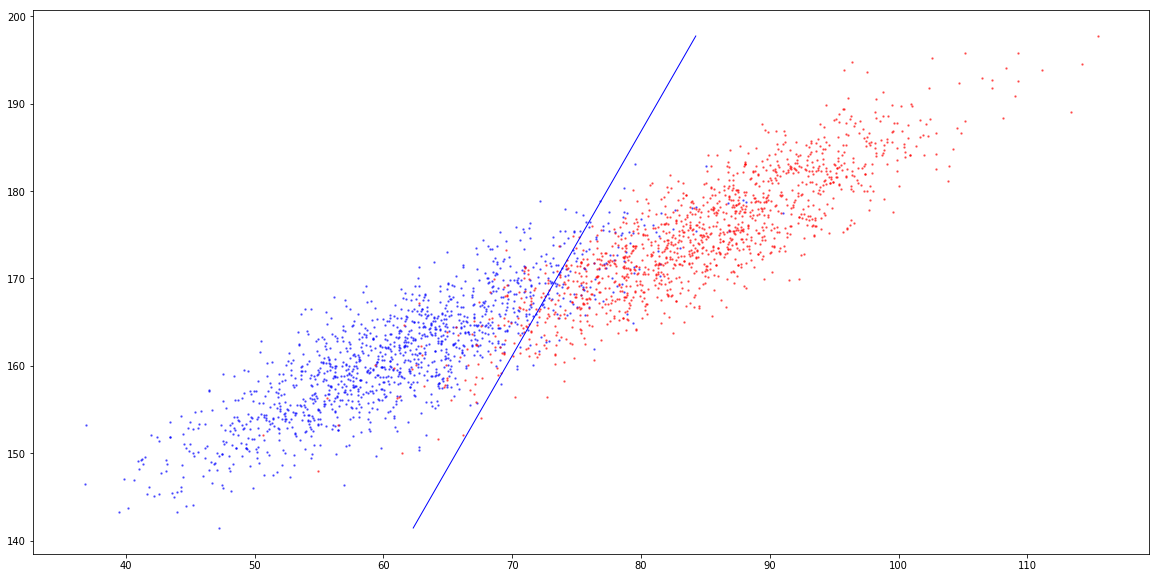

In [5]:
helper.plotBoundary(X_test, y_test,  clf, 50)

# Regresión logística en Keras

In [84]:
import numpy as np
from keras.models import Sequential #Para poder definir un modelo secuencial
from keras.layers import Dense, BatchNormalization #Para poder usar capas densas
from keras.optimizers import SGD, Adam
model=Sequential() #Queda definido el modelo sequencial
model.add(BatchNormalization())
model.add(Dense(1, input_shape=(2,),activation='sigmoid'))
#model.compile(optimizer=Adam(lr=1), loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy',metrics=['accuracy'])
epochs=20
learning_curve=helper.plot_learning_curve(plot_interval=1, 
                                          evaluate_interval=None, 
                                          x_val=None, 
                                          y_val_categorical=None,
                                          epochs=epochs)
def get_weights(model):
    w1=model.layers[1].get_weights()[0][0][0]
    w2=model.layers[1].get_weights()[0][1][0]
    return [w1,w2]

log_weights=helper.log_weights(get_weights)

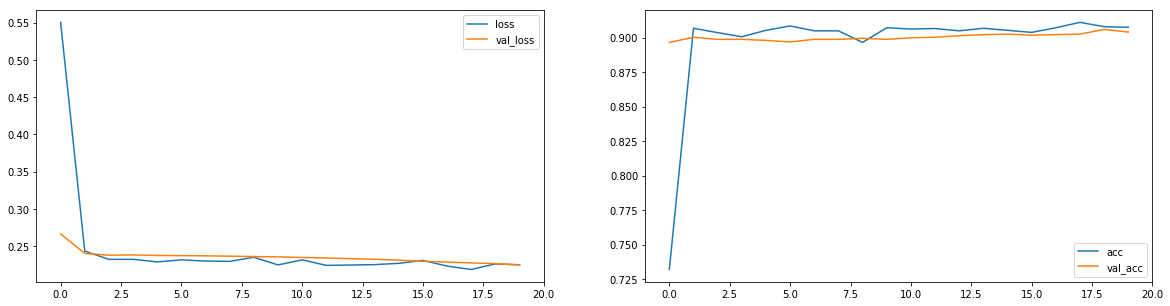

In [85]:
history=model.fit(X_train, y_train, validation_data=[X_test,y_test],
                  epochs=epochs,verbose=1, batch_size=64,shuffle = True,
                  callbacks=[learning_curve, log_weights]) 

In [77]:
history.history

{'val_loss': [0.9555235967491612,
  0.8973251797936179,
  0.8466666481711648,
  0.8011151548587915,
  0.7602688276406491,
  0.7238041285312538,
  0.6900688467603742,
  0.6603715405319677,
  0.6328448534011841,
  0.6075259736089995],
 'val_acc': [0.20984848484848484,
  0.22803030303030303,
  0.2537878787878788,
  0.290530303030303,
  0.34924242424242424,
  0.42916666666666664,
  0.5200757575757575,
  0.640530303030303,
  0.7549242424242424,
  0.825],
 'loss': [0.9948091839676473,
  0.9331942912357957,
  0.8776412769929687,
  0.829040027910204,
  0.785537423660506,
  0.7464911603215915,
  0.711039567349562,
  0.6790403723716736,
  0.6500145675531074,
  0.6235994645019076],
 'acc': [0.1968283582534363,
  0.21194029841850054,
  0.23544776123851094,
  0.2625,
  0.3031716417020826,
  0.37145522396955916,
  0.46100746268656717,
  0.5751865669862548,
  0.6893656718197153,
  0.7839552240585214],
 'weights': [[-0.21778643, 0.9067721],
  [-0.26214418, 0.8680536],
  [-0.3048515, 0.8325873],
  [-0.

In [29]:
history.params

{'batch_size': 64,
 'epochs': 10,
 'steps': None,
 'samples': 5360,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [30]:
from sklearn.preprocessing import normalize
X_train_norm=normalize(X_train)
X_loss=X_train[0:100,:]
y_loss=y_train[0:100]

In [35]:
def set_weights(model, w1, w2):
    weights=model.layers[0].get_weights()
    weights[0][0][0]=w1
    weights[0][1][0]=w2
    model.layers[0].set_weights(weights)

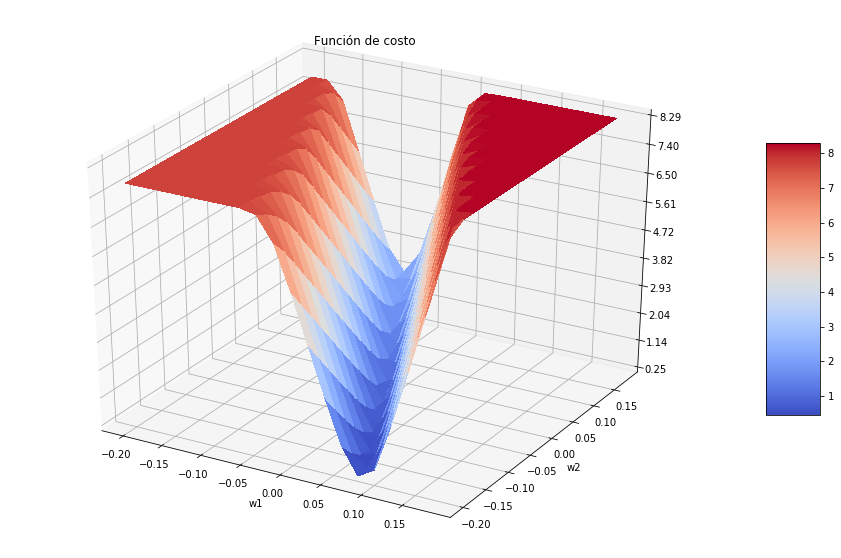

In [33]:
_,_,_=helper.plot_loss_surface(X_loss, y_loss, model, set_weights, [-0.2,0.2], [-0.2,0.2],20)

* Normalización
* Batch Normalization
* Inicialización de Kernel y bias